# Density Based clustering - DBSCAN

In [556]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
df.head()

,CustomerID,I,Iu,Imax,E,PIL,Mb,Ts,MeanD,MaxD,MinD,EDate
0,17850.0,1707,21,12,4.335643,2.567,156.860294,5333.25,0.000000,0.0,0.0,0.000000
1,13047.0,1386,105,32,6.503112,2.567,356.232222,3206.09,35.000000,70.0,0.0,2.226424
2,12583.0,4992,113,360,6.504979,2.752,442.969333,6644.54,24.266667,72.0,0.0,2.235084
3,13748.0,439,24,80,4.494680,2.567,189.650000,948.25,55.400000,136.0,0.0,1.177965
4,15100.0,80,1,32,0.000000,2.567,292.000000,876.00,13.000000,32.0,0.0,0.918296


## Transformation

In [557]:
#Eliminiamo il client id null per adesso poi non ci sarà
df=df[df["CustomerID"].notnull()]
del df['CustomerID']

#Eliminiamo MinD
del df['MinD']

#Eliminiamo MaxD
del df['MaxD']

#Eliminiamo Ts
del df['Ts']


df.head()

,I,Iu,Imax,E,PIL,Mb,MeanD,EDate
0,1707,21,12,4.335643,2.567,156.860294,0.000000,0.000000
1,1386,105,32,6.503112,2.567,356.232222,35.000000,2.226424
2,4992,113,360,6.504979,2.752,442.969333,24.266667,2.235084
3,439,24,80,4.494680,2.567,189.650000,55.400000,1.177965
4,80,1,32,0.000000,2.567,292.000000,13.000000,0.918296


In [558]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#StandardScaler corrisponde allo z scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
print(X[:8])

[[8.67950446e-03 1.14025086e-02 2.29214420e-03 4.18976976e-01
  1.67671736e-01 5.78415905e-03 0.00000000e+00 0.00000000e+00]
 [7.04637379e-03 5.92930445e-02 6.45967910e-03 6.28431304e-01
  1.67671736e-01 1.31542413e-02 1.91780822e-01 9.61982496e-01]
 [2.53923838e-02 6.38540479e-02 7.48072515e-02 6.28611740e-01
  1.79798112e-01 1.63606087e-02 1.32968037e-01 9.65724206e-01]
 [2.22838391e-03 1.31128848e-02 1.64617629e-02 4.34345594e-01
  1.67671736e-01 6.99627969e-03 3.03561644e-01 5.08969615e-01]
 [4.01923126e-04 0.00000000e+00 6.45967910e-03 0.00000000e+00
  1.67671736e-01 1.07798009e-02 7.12328767e-02 3.96772868e-01]
 [1.06891201e-02 3.42075257e-02 2.97978746e-02 5.54425513e-01
  1.67671736e-01 1.21932414e-02 1.33855186e-01 8.16972128e-01]
 [1.82086439e-02 8.32383124e-02 2.47968327e-02 6.58015362e-01
  1.67671736e-01 9.78543728e-03 9.31506849e-02 9.40992053e-01]
 [1.02566712e-02 2.56556442e-02 2.97978746e-02 5.25718650e-01
  1.67671736e-01 1.64538813e-02 1.61187215e-01 8.38302990e-01]]

In [559]:
#imports
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics
from itertools import product

In [560]:
k = 128
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

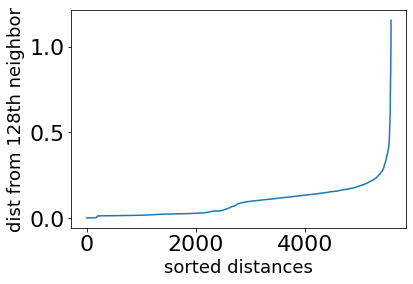

In [561]:
#Cerchiamo il range approssimativo di epsilon con la formula 
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [562]:

grid_params = {"minsamples": [3,14,20,50,100,150,170,180,200,250,300,350,400,450,500,550,600,700,800,1000],"eps":[0.10, 0.11, 0.12, 0.13,0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20,0.25,0.30,0.35,0.40,0.45,0.5]}



keys, values = zip(*grid_params.items())

params_list = [dict(zip(keys, v)) for v in product(*values)]
print(params_list)

[{'minsamples': 3, 'eps': 0.1}, {'minsamples': 3, 'eps': 0.11}, {'minsamples': 3, 'eps': 0.12}, {'minsamples': 3, 'eps': 0.13}, {'minsamples': 3, 'eps': 0.14}, {'minsamples': 3, 'eps': 0.15}, {'minsamples': 3, 'eps': 0.16}, {'minsamples': 3, 'eps': 0.17}, {'minsamples': 3, 'eps': 0.18}, {'minsamples': 3, 'eps': 0.19}, {'minsamples': 3, 'eps': 0.2}, {'minsamples': 3, 'eps': 0.25}, {'minsamples': 3, 'eps': 0.3}, {'minsamples': 3, 'eps': 0.35}, {'minsamples': 3, 'eps': 0.4}, {'minsamples': 3, 'eps': 0.45}, {'minsamples': 3, 'eps': 0.5}, {'minsamples': 14, 'eps': 0.1}, {'minsamples': 14, 'eps': 0.11}, {'minsamples': 14, 'eps': 0.12}, {'minsamples': 14, 'eps': 0.13}, {'minsamples': 14, 'eps': 0.14}, {'minsamples': 14, 'eps': 0.15}, {'minsamples': 14, 'eps': 0.16}, {'minsamples': 14, 'eps': 0.17}, {'minsamples': 14, 'eps': 0.18}, {'minsamples': 14, 'eps': 0.19}, {'minsamples': 14, 'eps': 0.2}, {'minsamples': 14, 'eps': 0.25}, {'minsamples': 14, 'eps': 0.3}, {'minsamples': 14, 'eps': 0.35}, {

In [563]:
min_s = 3
e = 0.7
value_list = []
max_silhouette = 0




#Cerchiamo la miglior combinazione tra il valore di epsilon e MinPoints, trovate da KNN
for elem in params_list:
    dbscan = DBSCAN(eps=elem["eps"], min_samples=elem["minsamples"])
    dbscan.fit(X)
    #print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
    value_list.append(silhouette_score(X,dbscan.labels_))

    if(silhouette_score(X, dbscan.labels_) > max_silhouette):
        max_silhouette = silhouette_score(X, dbscan.labels_)
        print(elem, max_silhouette)
    #min_s = min_s +1
    #e  = e + 0.01







{'minsamples': 3, 'eps': 0.14} 0.37830953022461855
{'minsamples': 3, 'eps': 0.15} 0.38020220047572756
{'minsamples': 3, 'eps': 0.16} 0.4030085701598807
{'minsamples': 3, 'eps': 0.17} 0.4161675765649857
{'minsamples': 3, 'eps': 0.18} 0.42878113150547675
{'minsamples': 3, 'eps': 0.19} 0.43390619599533825
{'minsamples': 3, 'eps': 0.2} 0.4504860328791096
{'minsamples': 3, 'eps': 0.3} 0.4544458554274768
{'minsamples': 3, 'eps': 0.35} 0.5133693420999828
{'minsamples': 3, 'eps': 0.4} 0.5231988121312284
{'minsamples': 3, 'eps': 0.5} 0.5298252637186032
{'minsamples': 14, 'eps': 0.4} 0.53995196352513
{'minsamples': 14, 'eps': 0.45} 0.544357175918192
{'minsamples': 14, 'eps': 0.5} 0.5533448102782628
{'minsamples': 50, 'eps': 0.5} 0.5550375017129742
{'minsamples': 300, 'eps': 0.13} 0.5565586385534039
{'minsamples': 350, 'eps': 0.14} 0.5587837751896509
{'minsamples': 400, 'eps': 0.15} 0.5602912416914375
{'minsamples': 500, 'eps': 0.16} 0.5630202573163776
{'minsamples': 550, 'eps': 0.17} 0.563882448

In [582]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))
dbscan = DBSCAN(eps=0.2, min_samples=700)
dbscan.fit(X)

Silhouette 0.5565586385534039


DBSCAN(eps=0.2, min_samples=700)

In [583]:
dbscan.labels_[:8]

array([ 0, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [584]:
#Numero di cluster ed elementi all'interno
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0], dtype=int64), array([2402, 3173], dtype=int64))

In [569]:
from scipy.spatial.distance import pdist, squareform

In [570]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[1.00420575 1.00139818 0.59302844 ... 0.18442198 0.08289247 0.15800434]

[[0.         1.00420575 1.00139818 ... 0.06326553 0.23135994 0.11016482]
 [1.00420575 0.         0.09305416 ... 0.99717004 0.98215228 0.99193177]
 [1.00139818 0.09305416 0.         ... 0.99379359 0.97869694 0.98807516]
 ...
 [0.06326553 0.99717004 0.99379359 ... 0.         0.18442198 0.08289247]
 [0.23135994 0.98215228 0.97869694 ... 0.18442198 0.         0.15800434]
 [0.11016482 0.99193177 0.98807516 ... 0.08289247 0.15800434 0.        ]]
